# Text Classification- Restaurant Reviews

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

### Preprocess the data

In [23]:
st = 'Hi All, Welcome to Deep Learning session!!...'

In [24]:
st = st.lower()
st

'hi all, welcome to deep learning session!!...'

In [25]:
import re
st = re.sub("[^a-z ]", '', st)
st

'hi all welcome to deep learning session'

### Create a functionto preprocess a simple text data

In [26]:
def preprocess_text(st):
    # Convert statement into lower case
    st = st.lower()
    # Remove the punctuations from the statements
    st = re.sub("[^a-z ]", '', st)
    return st

In [27]:
st = 'Hello, My name is Aishwarya...'

In [28]:
preprocess_text(st)

'hello my name is aishwarya'

### Apply the functions to original reviews

In [29]:
df['Review_pre'] = df['Review'].apply(preprocess_text)

In [30]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Seperate X & Y

In [31]:
X = df['Review_pre']
Y = df['Liked']

In [32]:
X.head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Review_pre, dtype: object

In [33]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

In [34]:
X[1]

'crust is not good'

### Apply TFIDF Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
X_pre.shape

(1000, 2046)

### Train test split

In [39]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2, random_state=21)

In [40]:
xtrain.shape

(800, 2046)

In [41]:
xtest.shape

(200, 2046)

### Create a Neural network

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [45]:
xtrain.shape[1]

2046

In [46]:
model = Sequential()

# HiddenLayer 1
model.add(Dense(256, activation='relu', input_dim= xtrain.shape[1]))
model.add(Dropout(0.6))

# HiddenLayer 2
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [49]:
hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=200, callbacks=[early_stop])

Epoch 1/200


25/25 [==============================] - 4s 39ms/step - loss: 0.6925 - accuracy: 0.4963 - val_loss: 0.6862 - val_accuracy: 0.5800
Epoch 2/200
25/25 [==============================] - 1s 34ms/step - loss: 0.6732 - accuracy: 0.6800 - val_loss: 0.6681 - val_accuracy: 0.7150
Epoch 3/200
25/25 [==============================] - 1s 30ms/step - loss: 0.6176 - accuracy: 0.8263 - val_loss: 0.6015 - val_accuracy: 0.7800
Epoch 4/200
25/25 [==============================] - 1s 21ms/step - loss: 0.4426 - accuracy: 0.8888 - val_loss: 0.4819 - val_accuracy: 0.7700
Epoch 5/200
25/25 [==============================] - 0s 17ms/step - loss: 0.2631 - accuracy: 0.9262 - val_loss: 0.4073 - val_accuracy: 0.8350
Epoch 6/200
25/25 [==============================] - 0s 16ms/step - loss: 0.1294 - accuracy: 0.9613 - val_loss: 0.4060 - val_accuracy: 0.8350
Epoch 7/200
25/25 [==============================] - 0s 16ms/step - loss: 0.0751 - accuracy: 0.9800 - val_loss: 0.3920 - val_accuracy: 0.8350
Epoc

### View the learning curve

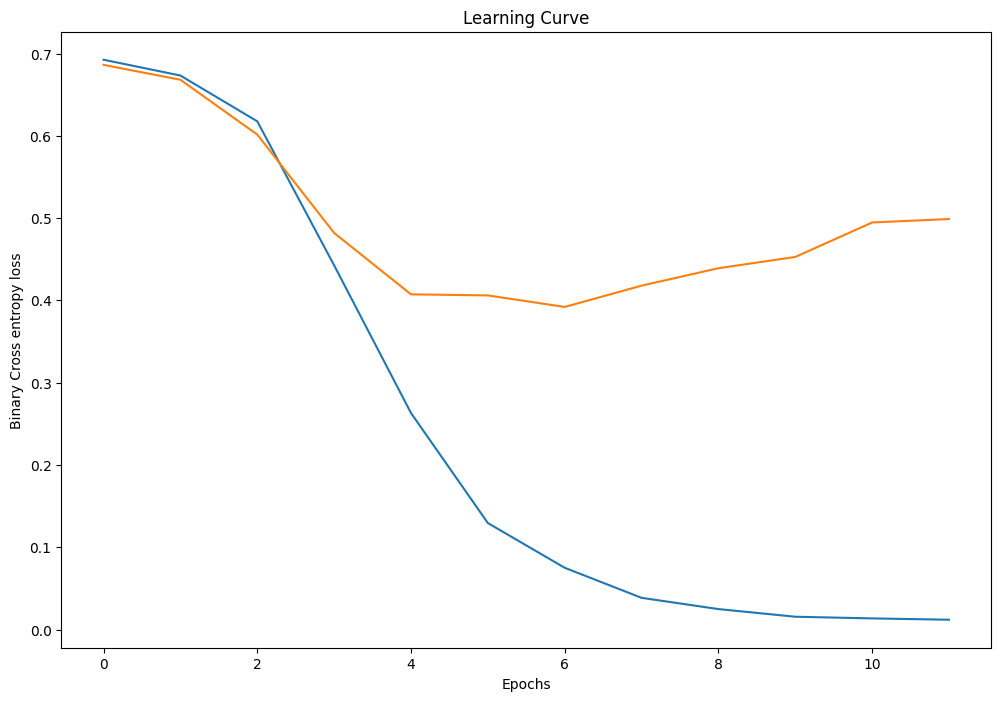

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'], label = 'Train loss')
plt.plot(hist.history['val_loss'],label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross entropy loss')
plt.title('Learning Curve')
plt.show()

### Evaluate model accuracy in Train & test

In [52]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000


[0.0025800049770623446, 1.0]

In [53]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.8050


[0.4988643527030945, 0.8050000071525574]

### Predict Probs for train & test

In [54]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [56]:
yprob_tr[0:5]

array([[9.96818423e-01],
       [9.99793231e-01],
       [9.99994516e-01],
       [1.19629025e-04],
       [2.23337775e-04]], dtype=float32)

In [57]:
ytrain[0:5]

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [58]:
yprob_ts[0:5]

array([[3.8253039e-02],
       [7.4456801e-04],
       [9.7867841e-01],
       [9.9963367e-01],
       [9.9993473e-01]], dtype=float32)

In [59]:
ytest[0:5]

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

### Convert Probability into prediction

In [60]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]

In [61]:
ypred_tr[0:5]

[1, 1, 1, 0, 0]

In [62]:
ytrain[0:5]

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [63]:
ypred_ts[0:5]

[0, 0, 1, 1, 1]

In [64]:
ytest[0:5]

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

### Create a confusion matrix

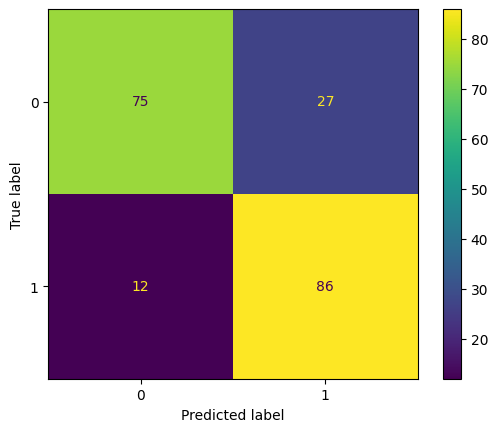

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()


### Check the classification report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       102
           1       0.76      0.88      0.82        98

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



### Save the model for future

In [67]:
model.save('TextClassify.keras')

### Load the above model

In [68]:
from keras.models import load_model
nn = load_model('TextClassify.keras')

In [69]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524032    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Use the model for text classification

In [71]:
def predict_sentiment(tfidf,model):
    # Take the input from user
    st = input('Please enter the review:')
    # Preprocess the text
    st_pre = preprocess_text(st)
    # Show statement before preprocessing
    print(f'Before preprocessing : {st}')
    print('\n============================\n')
    print(f'After preprocessing : {st_pre}')
    # Apply tfidf transform
    st_pre = tfidf.transform([st_pre]).toarray()
    # Predict the results
    prob = model.predict(st_pre)
    # Prediction
    if prob>=0.5:
        print('Given statement is POSITIVE')
    else:
        print('Given Statement is NEGATIVE')
    return prob

In [72]:
predict_sentiment(tfidf,model)

Before preprocessing : pizza Crust is not too good


After preprocessing : pizza crust is not too good
1/1 [==============================] - 1s 1s/step
Given Statement is NEGATIVE


array([[0.01003987]], dtype=float32)

In [73]:
predict_sentiment(tfidf,model)

Before preprocessing : ambience is good and service is also fast


After preprocessing : ambience is good and service is also fast
1/1 [==============================] - 0s 92ms/step
Given statement is POSITIVE


array([[0.9997956]], dtype=float32)